# suffix tree

In [1]:
from graphviz import Source

In [2]:
# each bracketed slice mark represents a part of a text like array indexing
# [a/b] represents a part of text that starts at character of index a(inclusively) and ends at b(exclusively)

class SuffixNode: 
    counter = 1
    
    def __init__(self,text,start=0,end=0,depth=0,parent=None):
        self.text = text
        self.start = start
        self.end = end
        self.parent = parent
        self.depth = depth
        self.children = {}
        self.id = SuffixNode.counter
        SuffixNode.counter += 1
    
    #adding a piece of a text to a node - creating a new edge in a tree
    def graft(self,newStart):
        newEnd = len(self.text)
        newDepth = self.depth + (newEnd - newStart)
        child = SuffixNode(self.text,newStart,newEnd,newDepth,self)
        self.children[self.text[newStart]] = child
    
    def break_path(self,string):
        length = len(string)
        child = self.children[string[0]]
        newNode = SuffixNode(self.text,child.start,child.start+length,self.depth + length, self)
        child.start = child.start + length
        child.parent = newNode
        newNode.children[self.text[child.start]] = child
        self.children.pop(string[0])
        self.children[string[0]] = newNode
        
        return newNode
    
    def slow_find(self,string):
        if len(string) == 0 or string[0] not in self.children.keys():
            return self
        child = self.children[string[0]]
        for i in range(1, child.end-child.start):
            if self.text[child.start+i] != string[i]:
                return self.break_path(string[:i])
        return child.slow_find(string[child.end-child.start:]) 
    
    
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
    
    def dot_edges(self):
        result = []
        for child in self.children.values():
            if child.start+1 == child.end:
                newLabel = child.text[child.start]
            else:
                newLabel = f'[{child.start}/{child.end}]'
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {newLabel}"];')
        return "\n".join(result)
    
    def get_all_children(self):
        result = [self]
        for child in self.children.values():
            result += child.get_all_children()
        return result 
    
    def show_tree(self):
        nodes = self.get_all_children()
        SuffixNode.show_graph(nodes)
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}
        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        s = Source(result)
        display(s)


In [3]:
class SuffixTree:
    def __init__(self,text):
        self.root = SuffixNode(text)
        self.leafs=[]
        self.leafs.append(self.root.graft(0))
        leaf = self.leafs[0]
        for i in range(1, len(text)):
            head = self.root.slow_find(text[i:])
            head.graft(i+head.depth)

                
    def show_stree(self):
        self.root.show_tree()

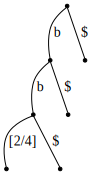

In [4]:
text0 = "bbb$"
tree0 = SuffixTree(text0)
tree0.show_stree()

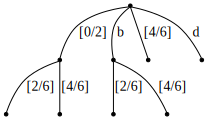

In [5]:
text1 = "ababcd"
tree1 = SuffixTree(text1)
tree1.show_stree()